In [4]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'har_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

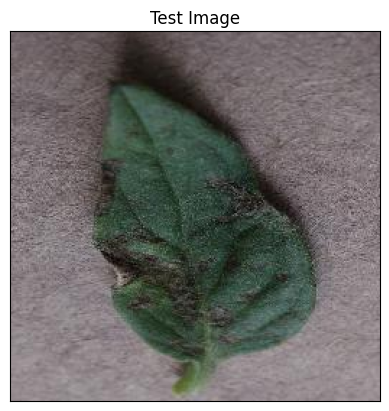

In [24]:
import cv2
image_path = 'test/TomatoEarlyBlight6.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [26]:
print(predictions)

[[1.3020623e-06 4.1276837e-07 7.4438349e-06 1.4270276e-04 3.2746204e-06
  3.1947504e-05 9.0084023e-07 1.3141720e-06 1.5955032e-07 3.1701925e-06
  1.2428139e-07 5.4200109e-06 1.3771779e-05 4.5996026e-07 3.3293384e-07
  2.9864834e-05 2.3797540e-05 4.9836875e-05 2.0239506e-06 4.1561138e-06
  1.7888857e-07 1.0039330e-04 1.6327969e-04 1.2773701e-06 7.1973918e-04
  2.4554117e-06 2.1806561e-06 3.3217108e-07 4.3488652e-04 6.3468767e-03
  4.6193181e-05 5.9064128e-05 1.9771651e-05 4.9817991e-02 9.3986392e-01
  3.5203510e-04 1.6823453e-03 6.4515545e-05]]


In [27]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

34


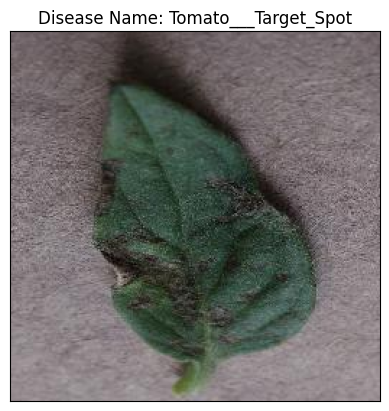

In [28]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()